In [1]:
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Conv1D, Input, Dropout, AvgPool1D, Reshape, Concatenate

2023-03-05 05:09:31.911627: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from keras.layers import Flatten, MaxPooling1D

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
column_names = ['id', 'diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness', 'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry', 'se_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']
breast_cancer_data = pd.read_csv(url, names=column_names)

X = breast_cancer_data.iloc[:, 2:].values
y = breast_cancer_data.iloc[:, 1].values

y = np.where(y == 'M', 0, 1)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input features to a 3D array (number of samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convert the target labels to categorical values
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

# Normalize the input features to have values between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


In [6]:
model = Sequential()

2023-03-05 05:10:29.224093: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 05:10:29.242798: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


In [7]:
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, y_test))


Epoch 1/50
15/15 [==============================] - 2s 55ms/step - loss: 0.6563 - accuracy: 0.5956 - val_loss: 0.5727 - val_accuracy: 0.5439
Epoch 2/50
15/15 [==============================] - 0s 17ms/step - loss: 0.5253 - accuracy: 0.7868 - val_loss: 0.3759 - val_accuracy: 0.9474
Epoch 3/50
15/15 [==============================] - 1s 42ms/step - loss: 0.3553 - accuracy: 0.8835 - val_loss: 0.2304 - val_accuracy: 0.9474
Epoch 4/50
15/15 [==============================] - 1s 41ms/step - loss: 0.2722 - accuracy: 0.9033 - val_loss: 0.1767 - val_accuracy: 0.9298
Epoch 5/50
15/15 [==============================] - 1s 49ms/step - loss: 0.2477 - accuracy: 0.8967 - val_loss: 0.1673 - val_accuracy: 0.9298
Epoch 6/50
15/15 [==============================] - 1s 43ms/step - loss: 0.2442 - accuracy: 0.9033 - val_loss: 0.1645 - val_accuracy: 0.9211
Epoch 7/50
15/15 [==============================] - 1s 48ms/step - loss: 0.2463 - accuracy: 0.9033 - val_loss: 0.1427 - val_accuracy: 0.9474
Epoch 8/50
15

In [11]:
# Evaluate the Conv1D model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Accuracy score:", accuracy_score(y_true, y_pred))

4/4 [==============================] - 0s 15ms/step
Accuracy score: 0.9473684210526315


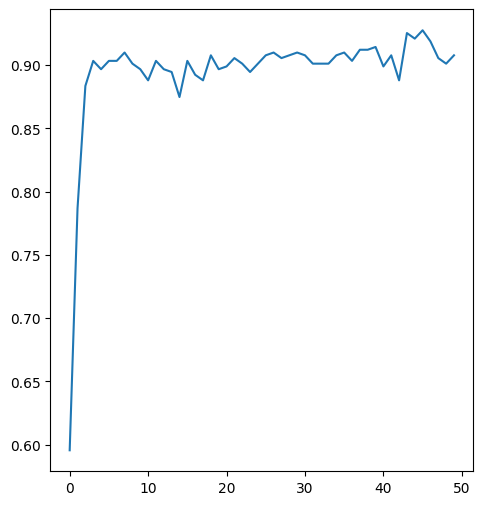

In [15]:
import matplotlib.pyplot as plt# Plot accuracy and loss graphs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


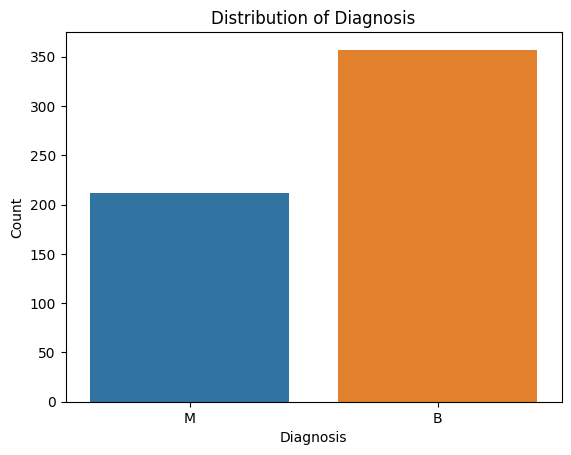

In [17]:
# Visualize the distribution of the target variable
sns.countplot(x='diagnosis', data=breast_cancer_data)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

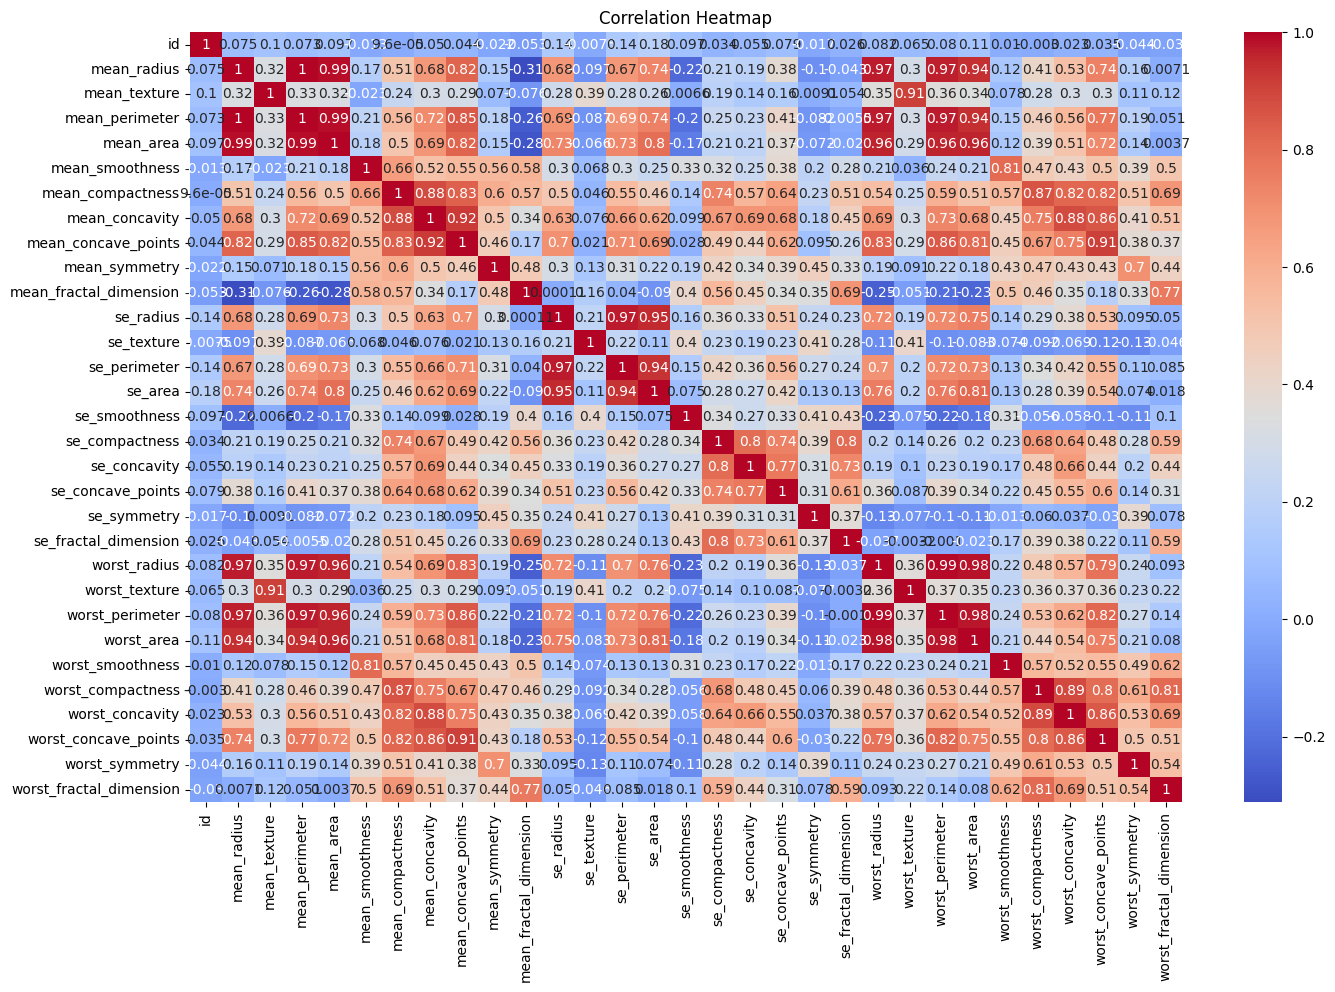

In [18]:
# Visualize the correlation between the features
corr = breast_cancer_data.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Visualize the relationship between the mean radius and the diagnosis
sns.boxplot(x='diagnosis', y='mean_radius', data=breast_cancer_data)
plt.title('Relationship between Diagnosis and Mean Radius')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Radius')
plt.show()